In [1]:
# Common imports
import numpy as np
import os

In [5]:
os.chdir('C:\\Users\\miaox\\Documents\\handson-ml')

In [15]:
datapath = os.path.join('datasets','lifesat','')

In [9]:
#import more
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [17]:
#load the data
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [19]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [20]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [ ]:
oecd_bli

In [24]:
#pre-process data
oecd_bli_sub = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
oecd_bli_pro = oecd_bli_sub.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli_pro.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [32]:
oecd_bli.groupby(['INEQUALITY','Indicator']).count()

LOCATION  Country  \
INEQUALITY Indicator                                                      
HGH        Employment rate                                  37       37   
           Household net adjusted disposable income         37       37   
           Life satisfaction                                36       36   
           Long-term unemployment rate                      37       37   
           Personal earnings                                37       37   
...                                                        ...      ...   
WMN        Student skills                                   37       37   
           Time devoted to leisure and personal care        37       37   
           Voter turnout                                    37       37   
           Water quality                                    37       37   
           Years in education                               37       37   

                                                      INDICATOR  MEASURE  \
INEQUALITY Indicator                                                       
HGH        Employment rate                                   37       37   
           Household net adjusted disposable income          37       37   
           Life satisfaction                                 36       36   
           Long-term unemployment rate                       37       37   
           Personal earnings                                 37       37   
...                                                         ...      ...   
WMN        Student skills                                    37       37   
           Time devoted to leisure and personal care         37       37   
           Voter turnout                                     37       37   
           Water quality                                     37       37   
           Years in education                                37       37   

                                                      Measure  Inequality  \
INEQUALITY Indicator                                                        
HGH        Employment rate                                 37          37   
           Household net adjusted disposable income        37          37   
           Life satisfaction                               36          36   
           Long-term unemployment rate                     37          37   
           Personal earnings                               37          37   
...                                                       ...         ...   
WMN        Student skills                                  37          37   
           Time devoted to leisure and personal care       37          37   
           Voter turnout                                   37          37   
           Water quality                                   37          37   
           Years in education                              37          37   

                                                      Unit Code  Unit  \
INEQUALITY Indicator                                                    
HGH        Employment rate                                   37    37   
           Household net adjusted disposable income          37    37   
           Life satisfaction                                 36    36   
           Long-term unemployment rate                       37    37   
           Personal earnings                                 37    37   
...                                                         ...   ...   
WMN        Student skills                                    37    37   
           Time devoted to leisure and personal care         37    37   
           Voter turnout                                     37    37   
           Water quality                                     37    37   
           Years in education                                37    37   

                                                      PowerCode Code  \
INEQUALITY Indicator                                             

In [37]:
oecd_bli.dtypes

LOCATION                  object
Country                   object
INDICATOR                 object
Indicator                 object
MEASURE                   object
Measure                   object
INEQUALITY                object
Inequality                object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes                object
Flags                     object
dtype: object

In [47]:
sat=oecd_bli.loc[(oecd_bli['INEQUALITY']=='TOT') & 
             (oecd_bli['Indicator']=='Life satisfaction')
            ].pivot_table('Value',index='Country')

In [54]:
sat.describe()

,Value
count,37.000000
mean,6.583784
std,0.778001
min,4.800000
25%,6.000000
50%,6.800000
75%,7.300000
max,7.500000


In [49]:
gdp_per = gdp_per_capita.rename(columns={'2015':'GDP per capita'}
                               ).pivot_table('GDP per capita', index='Country')

In [53]:
gdp_per.describe()

,GDP per capita
count,187.000000
mean,12590.961401
std,17387.035890
min,220.860000
25%,1783.538000
50%,5373.633000
75%,15490.576500
max,101994.093000


In [55]:
full_country_stats=pd.merge(left=sat, right=gdp_per, 
                            left_index=True, right_index=True)

In [59]:
part_country_stats= full_country_stats[full_country_stats['GDP per capita']<50000]

In [64]:
full_country_stats.head()

,Value,GDP per capita
Country,,
Australia,7.3,50961.865
Austria,6.9,43724.031
Belgium,6.9,40106.632
Brazil,7.0,8669.998
Canada,7.3,43331.961


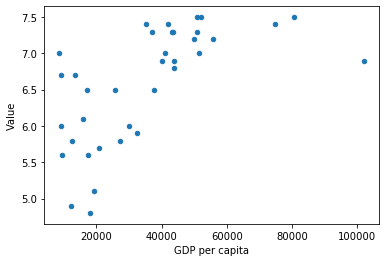

In [61]:
full_country_stats.plot(kind='scatter', x='GDP per capita', y='Value')

In [76]:
#prepare the data
X = np.c_[full_country_stats['GDP per capita']] #dataframe to array
y = full_country_stats['Value'].to_numpy()      #dataframe to array

In [77]:
y

array([7.3, 6.9, 6.9, 7. , 7.3, 6.7, 6.5, 7.5, 5.6, 7.4, 6.5, 7. , 4.8,
       4.9, 7.5, 7. , 7.4, 6. , 5.9, 5.8, 6.9, 6.7, 7.3, 7.3, 7.4, 5.8,
       5.1, 6. , 6.1, 5.7, 6.5, 7.2, 7.5, 5.6, 6.8, 7.2])

In [78]:
#build a linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# make a prediction
X_new =[[22578]]
print(model.predict(X_new))

[6.28632778]
